# Computer Vision

## Task 1

Давай загрузим датасет CIFAR-10. Допиши функцию [load_dataloaders](./code-samples/cv_utils.py) с помощью [torchvision.datasets.CIFAR10](https://pytorch.org/vision/main/generated/torchvision.datasets.CIFAR10.html)
и [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader), чтобы функция возвращала
DataLoaderы для train и test частей датасета. \
C помощью функции `len` количество батчей в train_loader и test_loader.
> Для DataLoader параметры `transform` и `batch_size` оставьте по умолчанию.
'../datasets/checkins.dat'

In [102]:
# Сохранение модели
torch.save(model.state_dict(), '../src/model.pth')

In [11]:
# Загрузка сохраненной модели
model = ResidualNet()
model.load_state_dict(torch.load('../src/model.pth'))
model.eval()

ResidualNet(
  (conv_3): Conv2d(3, 32, kernel_size=(1, 1), stride=(1, 1))
  (residual_block): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (clf): Sequential(
    (0): ReLU()
    (1): AvgPool2d(kernel_size=8, stride=8, padding=0)
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [57]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


BATCH_SIZE = 64  # Определение размера батча

def load_dataloaders():
    global BATCH_SIZE  # Объявление переменной как глобальной
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    # Загрузка обучающего датасета
    trainset = torchvision.datasets.CIFAR10(root='C:\jpro\DS09-1-develop\datasets', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

    # Загрузка тестового датасета
    testset = torchvision.datasets.CIFAR10(root='C:\jpro\DS09-1-develop\datasets', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

    # Подсчет количества батчей
    train_batches = len(trainloader)
    test_batches = len(testloader)

    return trainloader, testloader, train_batches, test_batches

# Пример использования функции
train_loader, test_loader, train_batches, test_batches = load_dataloaders()

print("Количество батчей в train_loader:", train_batches)
print("Количество батчей в test_loader:", test_batches)



Files already downloaded and verified
Files already downloaded and verified
Количество батчей в train_loader: 782
Количество батчей в test_loader: 157


In [58]:
# Вывод нескольких изображений и меток классов
dataiter = iter(train_loader)
images, labels = next(dataiter)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Вывод изображений и меток классов
for i in range(4):
    image = images[i]
    label = labels[i]
    print("Метка класса:", classes[label.item()])
    

Метка класса: car
Метка класса: truck
Метка класса: truck
Метка класса: car


## Task 2

Узнай, как из объекта DataLoader можно получить изображения и метки. \
Передай первые 4 изображения и метки из первого батча тестовой выборки в функцию [imshow](./code-samples/cv_utils.py).
С помощью нее можно визуализировать датасет. \
Должна получиться примерно такая визуализация.
![sample](../misc/images/images_sample.png)
> Картинки и метки могут отличаться. Главное чтобы метки сходились с изображениями)

               car                         truck                         truck                         car


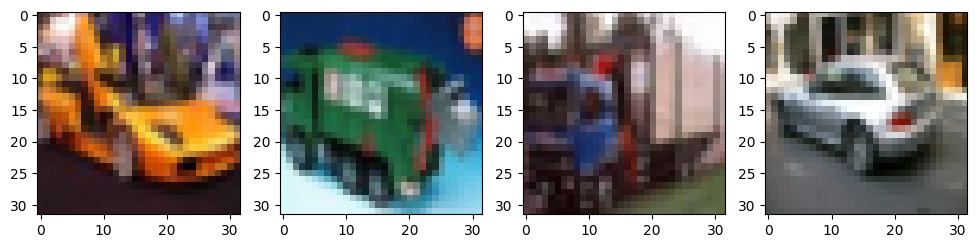

In [59]:
def imshow(images, labels, padding_size=15, labels_split_size=25):
    img = images[:4]
    labels = labels[:4]
    
    # Убрать нормализацию
    img = img / 2 + 0.5    
    npimg = img.numpy()
    
    label_text = (' ' * labels_split_size).join('{}'.format(classes[j]) for j in labels.tolist())
    print(' ' * padding_size + label_text)
    
    fig, axs = plt.subplots(1, npimg.shape[0], figsize=(12, 3))
    
    for i in range(npimg.shape[0]):
        axs[i].imshow(np.transpose(npimg[i], (1, 2, 0)))
        axs[i].axis('on')
    
    plt.show()
imshow(images, labels)

## Task 3

Теперь попробуем написать небольшую сверточную нейронную сеть, которую мы будем обучать классифицировать изображения.

Напишем сеть, основанную на одном блоке архитектуры [ResNet](https://arxiv.org/pdf/1512.03385.pdf) - Residual-Block. Схема этого блока приведена ниже:

<img src="../misc/images/rediual_block.png" width="500"/>

Допишите класс ResidualNet:
- Все сверточные слои должны иметь 32 выходных канала, а также не должны изменять ширину и высоту изображения.
- Также в сверточных слоях `padding = 1`

Функции, которые вам понадобяться: 
[Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), [BatchNorm2d](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html), [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html).

Для базовой проверки, что сеть написана верно этот код не должен выдавать ошибку\
`assert net(torch.zeros((10, 3, 32, 32))).shape == (10, 10)`

In [60]:
class ResidualNet(nn.Module):
    def __init__(self, n_classes=10):
        super().__init__()

        self.conv_3 = nn.Conv2d(3, 32, kernel_size=1)

        self.residual_block = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )

        self.clf = nn.Sequential(
            nn.ReLU(),
            nn.AvgPool2d(8),
            nn.Flatten(1),
            nn.Linear(512, n_classes)
        )

    def forward(self, x):
        out = self.residual_block(x)
        out = out + self.conv_3(x)
        out = self.clf(out)

        return out

# Проверка
net = ResidualNet()
input_data = torch.zeros((10, 3, 32, 32))
output = net(input_data)
assert output.shape == (10, 10)

In [61]:
# Код тут

## Task 4

Перейдем к обучению сети. В этом вам поможет класс [Trainer](./code-samples/cv_utils.py).\
Для обучения кроме самой модели 
требуемся определить оптимизатор и функцию ошибок:
* В качестве оптимизатора выберите [стохастический градиентный спуск](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)
* В качестве функции ошибок
[кросс-энтропия](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)

Обучите сеть и с помощью функции [plot_train_log](./code-samples/cv_utils.py) визуализируй процесс обучения модели.

In [62]:
class Trainer:
    
    def __init__(self, model, optimizer, criterion):
        self.model = model
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        self.model = self.model.to(self.device)
        print('Сеть загружена на', self.device)
        
        self.optimizer = optimizer
        self.criterion = criterion

    def _train_epoch(self, train_loader):
        loss_log = []
        acc_log = []
        self.model.train()

        for data, target in train_loader:
            data = data.to(self.device)
            target = target.to(self.device)

            self.optimizer.zero_grad()
            logits = self.model(data)

            loss = self.criterion(logits, target)
            loss.backward()
            self.optimizer.step()

            loss_log.append(loss.item() * data.shape[0])

            acc = (logits.argmax(dim=1) == target).sum()
            acc_log.append(acc.item() / data.shape[0]) 

        return np.mean(loss_log), np.mean(acc_log)

    def train(self, train_loader, test_loader, n_epochs):
        
        self.train_loss_log = [] 
        self.train_acc_log = [] 
        self.test_loss_log = []
        self.test_acc_log = []
        
        for epoch in range(n_epochs):
            train_loss, train_acc = self._train_epoch(train_loader)
            test_loss, test_acc = self.test(test_loader)

            self.train_loss_log.append(train_loss)
            self.train_acc_log.append(train_acc)

            self.test_loss_log.append(test_loss)
            self.test_acc_log.append(test_acc)

            print(f"Epoch {epoch}")
            print(f" train loss: {np.mean(train_loss)}, train acc: {np.mean(train_acc)}")
            print(f" test loss: {test_loss}, test acc: {test_acc}\n")
    
    def test(self, test_loader):
        loss_log = []
        acc_log = []
        self.model.eval()

        for data, target in test_loader:
            data = data.to(self.device)
            target = target.to(self.device)

            with torch.no_grad():
                logits = self.model(data)
                loss = self.criterion(logits, target)

            loss_log.append(loss.item() * data.shape[0])

            acc = (logits.argmax(dim=1) == target).sum()
            acc_log.append(acc.item() / data.shape[0]) 

        return np.mean(loss_log), np.mean(acc_log)

In [63]:
def plot_train_log(trainer):
    fig, axs = plt.subplots(1, 2, figsize=(13, 4))

    axs[0].plot(range(1, len(trainer.train_loss_log) + 1), trainer.train_loss_log, label='train')
    axs[0].plot(range(1, len(trainer.test_loss_log) + 1), trainer.test_loss_log, label='test')
    axs[0].set_ylabel('Loss')

    axs[1].plot(range(1, len(trainer.train_acc_log) + 1), trainer.train_acc_log, label='train')
    axs[1].plot(range(1, len(trainer.test_acc_log) + 1), trainer.test_acc_log, label='test')
    axs[1].set_ylabel('Accuracy')

    for ax in axs:
        ax.set_xlabel('Epoch')
        ax.legend()

    plt.show()

In [64]:
# Проверяет доступность CUDA
print(torch.cuda.is_available())  
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if device.type == 'cuda':
    properties = torch.cuda.get_device_properties(device)
    print(properties)
else:
    print("CUDA недоступна. Проверьте настройки вашей системы.")


True
_CudaDeviceProperties(name='NVIDIA GeForce GTX 1050 Ti', major=6, minor=1, total_memory=4095MB, multi_processor_count=6)


Сеть загружена на cuda:0
Epoch 0
 train loss: 102.0271867254506, train acc: 0.41851822250639387
 test loss: 93.39715367213935, test acc: 0.4753184713375796

Epoch 1
 train loss: 85.47647875227281, train acc: 0.5208799552429667
 test loss: 81.7678337097168, test acc: 0.5415007961783439

Epoch 2
 train loss: 78.70111038373864, train acc: 0.5625
 test loss: 78.68830893449723, test acc: 0.5645899681528662

Epoch 3
 train loss: 75.00059163905776, train acc: 0.5855179028132992
 test loss: 76.81583926935865, test acc: 0.5702627388535032

Epoch 4
 train loss: 72.6102066113211, train acc: 0.6015425191815856
 test loss: 73.92216309468458, test acc: 0.5886743630573248



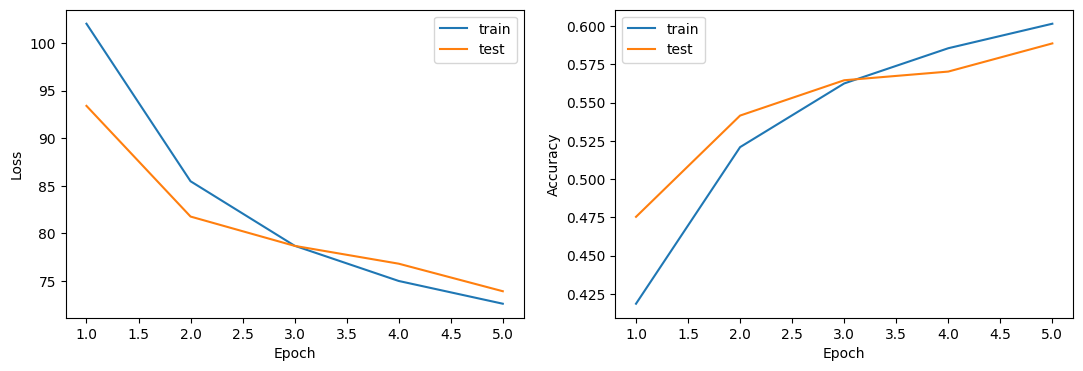

In [101]:
torch.autograd.set_detect_anomaly(True)

# Определение модели, оптимизатора, функции ошибки и загрузка данных

model = ResidualNet()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()

# Создание экземпляра Trainer и обучение модели
trainer = Trainer(model, optimizer, criterion)
trainer.train(train_loader, test_loader, n_epochs=5)

# Визуализация процесса обучения
plot_train_log(trainer)





## Task 5

Одной стандартной техникой, применяющейся в глубинном обучении, а особенно часто в компьютерном зрении, являются аугментации данных. \
Суть аугментаций состоит в том, что мы можем некоторым синтетическим образом видоизменять объекты обучающей выборки,  тем самым расширяя ее, а также делая итоговую модель более устойчивой к таким изменениям.
Наиболее удобным способом работы с аугментациями в PyTorch является их задание в списке `transforms`, который затем передается в Dataloader.\
Изучи, какие [способы аугментаций](https://pytorch.org/vision/main/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py) 
изображений можно использовать PyTorch. Выберите несколько из них и визуализируйте как изменился датасет. 
![sample](../misc/images/images_sample.png)
![sample](../misc/images/augment.png)

Обучите сеть с аугментацией данных и с помощью функции [plot_train_log](./code-samples/cv_utils.py) визуализируй процесс обучения модели.

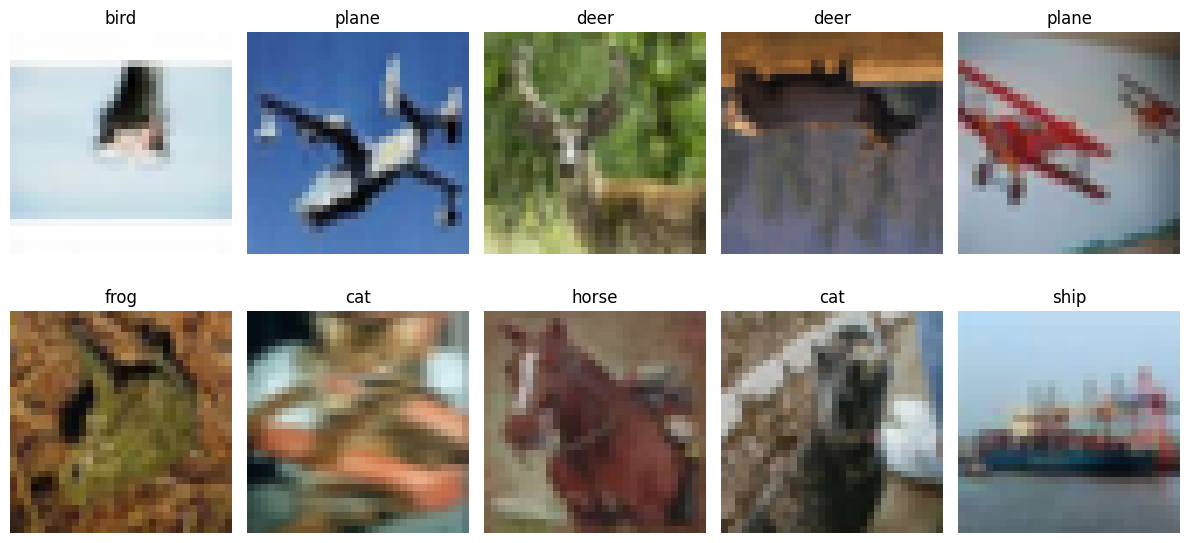

In [100]:
transform_v2 = transforms.Compose([
    #transforms.RandomGrayscale(p=0.9),
    transforms.RandomVerticalFlip(p=0.5),
    #transforms.RandomHorizontalFlip(p=1),
    #transforms.ColorJitter(0.3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Обновить преобразования в test_loader и\или train_loader 
test_loader.dataset.transform = transform_v2
train_loader.dataset.transform = transform_v2
#images, labels = next(iter(test_loader))
images, labels = next(iter(train_loader))
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    img = images[i].permute(1, 2, 0)
    img = img / 2 + 0.5
    ax.imshow(img.squeeze(), cmap='gray')
    ax.axis('off')
    ax.set_title(classes[labels[i]])

plt.tight_layout()
plt.show()

In [99]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = net.to(device)
class_correct = [0] * 10
class_total = [0] * 10

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == labels).squeeze()
        
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

for i in range(10):
    print(f'Accuracy of {classes[i]}: {100 * class_correct[i] / class_total[i]:.2f}%')

Accuracy of plane: 3.60%
Accuracy of car: 0.00%
Accuracy of bird: 0.30%
Accuracy of cat: 54.30%
Accuracy of deer: 29.40%
Accuracy of dog: 5.20%
Accuracy of frog: 0.10%
Accuracy of horse: 2.70%
Accuracy of ship: 11.20%
Accuracy of truck: 0.00%
